In [25]:
import pandas as pd 
import math
import numpy as np

In [5]:
info = pd.read_csv("subject-info.csv")
measures = pd.read_csv("test_measure.csv")
joined = pd.merge(info, measures,on=["ID","ID_test"])
joined

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test,time,Speed,HR,VO2,VCO2,RR,VE
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1,0,0.0,NaN,585.0,566.0,13,21.5
1,10.8,48.8,163.0,39.0,20.7,1,543,543_1,3,0.0,NaN,223.0,215.0,19,9.4
2,10.8,48.8,163.0,39.0,20.7,1,543,543_1,10,0.0,58.0,309.0,302.0,9,10.5
3,10.8,48.8,163.0,39.0,20.7,1,543,543_1,13,0.0,NaN,280.0,272.0,12,10.2
4,10.8,48.8,163.0,39.0,20.7,1,543,543_1,17,0.0,96.0,294.0,283.0,13,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575082,63.0,83.5,171.5,48.0,22.2,0,296,296_1,747,5.0,109.0,1346.0,1569.0,24,55.3
575083,63.0,83.5,171.5,48.0,22.2,0,296,296_1,749,5.0,109.0,1346.0,1561.0,24,54.7
575084,63.0,83.5,171.5,48.0,22.2,0,296,296_1,752,5.0,109.0,1381.0,1578.0,24,54.5
575085,63.0,83.5,171.5,48.0,22.2,0,296,296_1,754,5.0,110.0,1356.0,1533.0,24,52.9


In [9]:
def maxHR(age, gender):
    if gender == 0:
        mhr = 203.7/(1+math.e**(.033*(age-104.3)))
    else:
        mhr = 190.2/(1+math.e**(.0453*(age-107.5)))
    return mhr
maxHR(20,0)


191.82222472241378

In [13]:
joined["Max_HR"] = joined[["Age","Sex"]].apply(lambda row: maxHR(row["Age"],row["Sex"]),axis=1)

In [15]:
joined["HR_Percent"] = joined["HR"]/joined["Max_HR"]

In [26]:
def hr_to_zone(hr_percent):
    if hr_percent<.5:
        zone = 0
    elif hr_percent<.6:
        zone = 1
    elif hr_percent<.7:
        zone = 2
    elif hr_percent<.8:
        zone = 3
    elif hr_percent<.9:
        zone = 4
    elif hr_percent>=.9:
        zone = 5
    else:
        zone = np.nan
    return zone

In [27]:
joined["Zone"] = joined["HR_Percent"].apply(hr_to_zone)

In [29]:
joined["Zone"].value_counts()

Zone
5.0    183391
4.0    121239
3.0     91368
2.0     77858
1.0     61015
0.0     39235
Name: count, dtype: int64

In [36]:
joined = joined.dropna()
X = joined[["Age","Weight","Height","Sex","Zone"]]
y = joined[["Speed","HR"]]
X.to_csv("input.csv",index=False)
y.to_csv("output.csv",index=False)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test

,Speed,HR
271611,7.8,156.0
441226,17.5,174.0
107745,11.8,176.0
501730,4.9,144.0
217575,12.0,162.0
...,...,...
134593,18.2,192.0
151556,5.0,146.0
89650,5.0,128.0
133068,13.7,166.0


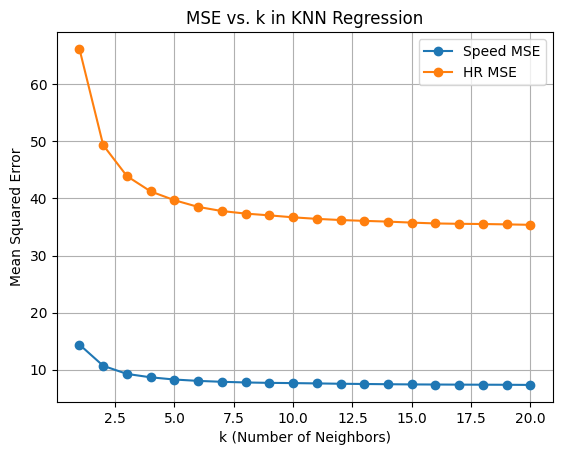

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Try a range of k values
k_values = range(1, 21)
mse_speed = []
mse_hr = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Separate predictions for each target
    pred_speed = preds[:, 0]
    pred_hr = preds[:, 1]

    mse_speed.append(mean_squared_error(y_test['Speed'], pred_speed))
    mse_hr.append(mean_squared_error(y_test['HR'], pred_hr))
plt.plot(k_values, mse_speed, label='Speed MSE', marker='o')
plt.plot(k_values, mse_hr, label='HR MSE', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. k in KNN Regression')
plt.legend()
plt.grid(True)
plt.show()